In [1]:
#From 'The Glowing Python'
import pandas as pd
df = pd.read_csv('NZAlcoholConsumption.csv')
to_forecast = df.TotalBeer.values
dates = df.DATE.values

In [84]:
import numpy as np

def organize_data(to_forecast, window, horizon):
    """
     Input:
      to_forecast, univariate time series organized as numpy array
      window, number of items to use in the forecast window
      horizon, horizon of the forecast
     Output:
      X, a matrix where each row contains a forecast window
      y, the target values for each row of X
    """
    shape = to_forecast.shape[:-1] + \
            (to_forecast.shape[-1] - window + 1, window)
    strides = to_forecast.strides + (to_forecast.strides[-1],)
    X = np.lib.stride_tricks.as_strided(to_forecast, 
                                        shape=shape, 
                                        strides=strides)
    y = np.array([X[i+horizon][-1] for i in range(len(X)-horizon)])
    return X[:-horizon], y

k = 4   # number of previous observations to use
h = 1   # forecast horizon
X,y = organize_data(to_forecast, k, h)

In [89]:
print(X)


[[ 2.957  2.823  2.798  3.997]
 [ 2.823  2.798  3.997  3.037]
 [ 2.798  3.997  3.037  2.778]
 [ 3.997  3.037  2.778  2.857]
 [ 3.037  2.778  2.857  3.967]
 [ 2.778  2.857  3.967  3.094]
 [ 2.857  3.967  3.094  2.819]
 [ 3.967  3.094  2.819  3.052]
 [ 3.094  2.819  3.052  4.088]
 [ 2.819  3.052  4.088  3.044]
 [ 3.052  4.088  3.044  2.849]
 [ 4.088  3.044  2.849  3.137]
 [ 3.044  2.849  3.137  4.04 ]
 [ 2.849  3.137  4.04   3.337]
 [ 3.137  4.04   3.337  2.726]
 [ 4.04   3.337  2.726  3.135]
 [ 3.337  2.726  3.135  3.904]
 [ 2.726  3.135  3.904  3.222]
 [ 3.135  3.904  3.222  3.058]
 [ 3.904  3.222  3.058  2.992]
 [ 3.222  3.058  2.992  4.025]
 [ 3.058  2.992  4.025  3.027]
 [ 2.992  4.025  3.027  2.796]
 [ 4.025  3.027  2.796  2.921]
 [ 3.027  2.796  2.921  4.256]
 [ 2.796  2.921  4.256  3.169]
 [ 2.921  4.256  3.169  2.87 ]
 [ 4.256  3.169  2.87   2.864]
 [ 3.169  2.87   2.864  4.267]
 [ 2.87   2.864  4.267  3.399]
 [ 2.864  4.267  3.399  3.296]
 [ 4.267  3.399  3.296  2.78 ]
 [ 3.399

In [90]:
from sklearn.linear_model import LinearRegression
 
m = 10 # number of samples to take in account
regressor = LinearRegression(normalize=True)
regressor.fit(X[:m], y[:m])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [91]:
def mape(ypred, ytrue):
    """ returns the mean absolute percentage error """
    idx = ytrue != 0.0
    return 100*np.mean(np.abs(ypred[idx]-ytrue[idx])/ytrue[idx])

print('The error is %0.2f%%' % mape(regressor.predict(X[m:]),y[m:]))

The error is 6.15%


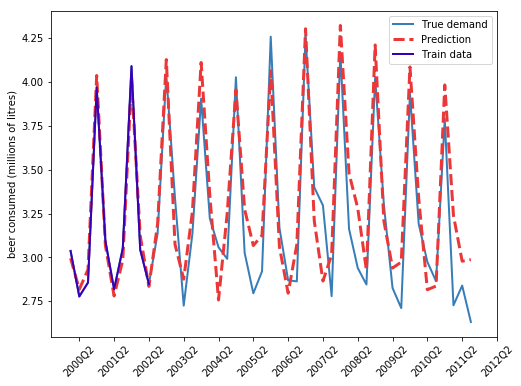

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(y, label='True demand', color='#377EB8', linewidth=2)
plt.plot(regressor.predict(X), \
     '--', color='#EB3737', linewidth=3, label='Prediction')
plt.plot(y[:m], label='Train data', color='#3700B8', linewidth=2)
plt.xticks(np.arange(len(dates))[1::4],dates[1::4], rotation=45)
plt.legend(loc='upper right')
plt.ylabel('beer consumed (millions of litres)')
plt.show()

In [4]:
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = np.genfromtxt(url, delimiter=',', dtype='float', usecols=[0,1,2,3])

# Solution 1
print(np.corrcoef(iris[:, 0], iris[:, 2]))

[[ 1.          0.87175416]
 [ 0.87175416  1.        ]]


In [3]:
arr = np.arange(9).reshape(3,3)

# Solution
arr[:, ::-1]

array([[2, 1, 0],
       [5, 4, 3],
       [8, 7, 6]])